In [21]:
import pandas as pd
import numpy as np

In [2]:
books = pd.read_csv('./target/okx_features.csv')

In [3]:
books.shape

(86400, 25)

In [25]:
trades = pd.read_csv('./btcusdt_trade/BTC-USDT-trades-2025-10-01.csv')

In [29]:
trades[trades.created_time.between(1759276800000, 1759276801000)]

,instrument_name,trade_id,side,price,size,created_time
186390,BTC-USDT,812771243,sell,114047.1,0.000086,1759276800440
186391,BTC-USDT,812771244,buy,114047.2,0.000175,1759276800542
186392,BTC-USDT,812771245,buy,114047.2,0.000044,1759276800542
186393,BTC-USDT,812771246,buy,114047.2,0.000123,1759276800542
186394,BTC-USDT,812771247,buy,114047.2,0.000018,1759276800548
...,...,...,...,...,...,...
186511,BTC-USDT,812771364,buy,114061.0,0.000021,1759276800928
186512,BTC-USDT,812771365,buy,114061.4,0.000010,1759276800930
186513,BTC-USDT,812771366,buy,114061.4,0.000010,1759276800930
186514,BTC-USDT,812771367,buy,114061.4,0.000010,1759276800930


In [34]:
trades[trades.created_time.between(1759276810000, 1759276811000)]

,instrument_name,trade_id,side,price,size,created_time
186828,BTC-USDT,812771681,buy,114084.0,0.000103,1759276810062
186829,BTC-USDT,812771682,buy,114084.0,0.008765,1759276810123
186830,BTC-USDT,812771683,buy,114084.0,0.000018,1759276810139
186831,BTC-USDT,812771684,buy,114084.0,0.000123,1759276810149
186832,BTC-USDT,812771685,buy,114084.0,0.008726,1759276810149
186833,BTC-USDT,812771686,buy,114084.0,0.000035,1759276810149
186834,BTC-USDT,812771687,buy,114084.0,0.000088,1759276810162
186835,BTC-USDT,812771688,buy,114084.0,0.000018,1759276810162
186836,BTC-USDT,812771689,buy,114084.0,0.000263,1759276810162
186837,BTC-USDT,812771690,buy,114084.0,0.000219,1759276810162


In [4]:
books.head()

,timestamp,iso_time,vwap,buy_volume,sell_volume,ask_size_1,ask_size_2,ask_size_3,ask_size_4,ask_size_5,...,bid_size_1,bid_size_2,bid_size_3,bid_size_4,bid_size_5,bid_size_6,bid_size_7,bid_size_8,bid_size_9,bid_size_10
0,1759276801000,2025-10-01T00:00:01.000Z,114049.323681,1.833670,0.000086,0.250000,0.001807,0.000163,0.000017,0.000010,...,1.143126,0.000845,0.030865,0.032400,0.058937,0.029276,0.169788,0.032400,0.069940,0.034207
1,1759276802000,2025-10-01T00:00:02.000Z,114067.813647,0.093855,0.051521,0.191341,0.010003,0.001806,0.000021,0.009457,...,1.437808,0.549966,0.527676,0.032400,0.030863,0.018145,0.034207,0.000030,0.237046,0.066638
2,1759276803000,2025-10-01T00:00:03.000Z,114066.633379,0.019652,0.030516,1.776695,0.132400,0.323401,0.100000,0.100000,...,0.138513,0.001807,0.001000,0.027691,0.001867,0.034207,0.027979,0.037203,0.001807,0.001000
3,1759276804000,2025-10-01T00:00:04.000Z,114062.100363,0.001358,0.235994,0.590769,0.032400,0.054986,0.032400,0.032400,...,0.537266,0.062184,0.032400,0.006051,0.027691,0.062245,0.066638,0.034207,0.032400,0.001807
4,1759276805000,2025-10-01T00:00:05.000Z,114063.214639,0.009554,-0.000000,0.025642,0.004380,0.001807,0.012000,0.031807,...,0.955357,0.000710,0.069940,0.032400,0.055712,0.489505,0.206830,0.034207,0.032400,0.001000


In [5]:
books.tail()

,timestamp,iso_time,vwap,buy_volume,sell_volume,ask_size_1,ask_size_2,ask_size_3,ask_size_4,ask_size_5,...,bid_size_1,bid_size_2,bid_size_3,bid_size_4,bid_size_5,bid_size_6,bid_size_7,bid_size_8,bid_size_9,bid_size_10
86395,1759363196000,2025-10-01T23:59:56.000Z,118583.306848,0.426573,0.000200,0.039512,0.013640,0.000011,0.000010,0.010189,...,0.740944,0.032400,0.346649,0.026767,0.009482,0.234827,0.032400,0.199686,0.03240,0.006458
86396,1759363197000,2025-10-01T23:59:57.000Z,118605.743943,0.010390,0.000016,0.243488,0.000011,0.010189,0.035225,0.013640,...,0.223224,0.004213,0.032400,0.032400,0.012000,0.012010,0.116710,0.000822,0.03240,0.013640
86397,1759363198000,2025-10-01T23:59:58.000Z,6876.008553,-0.000000,-0.000000,0.243488,0.000011,0.010189,0.036676,0.042684,...,0.306898,0.032400,0.048083,0.032400,0.012000,0.116710,0.000822,0.032400,0.01364,0.032400
86398,1759363199000,2025-10-01T23:59:59.000Z,118607.627294,0.000745,0.000084,0.251174,0.000011,0.010189,0.033620,0.110000,...,0.218500,0.032400,0.004213,0.032400,0.012000,0.116710,0.000822,0.032400,0.01364,0.032400
86399,1759363200000,2025-10-02T00:00:00.000Z,6876.008537,-0.000000,-0.000000,0.473635,0.000011,0.010189,0.033620,0.110000,...,0.056504,0.004213,0.012000,0.032400,0.000822,0.032400,0.013640,0.032400,0.01364,0.032400


In [38]:
books[books.vwap == 0]

,timestamp,iso_time,vwap,buy_volume,sell_volume,ask_size_1,ask_size_2,ask_size_3,ask_size_4,ask_size_5,...,bid_size_1,bid_size_2,bid_size_3,bid_size_4,bid_size_5,bid_size_6,bid_size_7,bid_size_8,bid_size_9,bid_size_10


In [39]:
books[((books.buy_volume == 0) & (books.sell_volume != 0))]

,timestamp,iso_time,vwap,buy_volume,sell_volume,ask_size_1,ask_size_2,ask_size_3,ask_size_4,ask_size_5,...,bid_size_1,bid_size_2,bid_size_3,bid_size_4,bid_size_5,bid_size_6,bid_size_7,bid_size_8,bid_size_9,bid_size_10
36,1759276837000,2025-10-01T00:00:37.000Z,114096.308442,-0.0,0.000072,1.150234,0.035000,0.032400,0.076971,0.027647,...,0.212864,0.023910,0.014701,0.027958,0.034207,0.025441,0.032460,0.001807,0.030030,0.001000
42,1759276843000,2025-10-01T00:00:43.000Z,114092.018910,-0.0,0.000010,0.811241,0.035000,0.040209,0.076971,0.027647,...,0.433270,0.023910,0.014701,0.027958,0.034207,0.025441,0.032460,0.001807,0.030030,0.001000
75,1759276876000,2025-10-01T00:01:16.000Z,114116.996678,-0.0,0.015000,1.051090,0.000017,0.000010,0.000035,0.034207,...,0.614106,0.029585,0.032400,0.032400,0.034207,0.030917,0.032400,0.043840,0.237259,0.157568
79,1759276880000,2025-10-01T00:01:20.000Z,114116.932885,-0.0,0.000742,0.906406,0.000017,0.000010,0.000035,0.041563,...,0.642300,0.030200,0.043797,0.000845,0.032400,0.028740,0.032400,0.034207,0.030917,0.032400
80,1759276881000,2025-10-01T00:01:21.000Z,114116.903329,-0.0,0.000515,0.710706,0.000017,0.000010,0.000035,0.041563,...,0.735063,0.030200,0.043797,0.000845,0.032400,0.028740,0.032400,0.034207,0.030917,0.012023
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86348,1759363149000,2025-10-01T23:59:09.000Z,118559.595734,-0.0,0.169344,0.946517,0.198000,0.045493,0.013640,0.120000,...,0.076180,0.032400,0.000160,0.032400,0.013640,0.032400,0.000037,0.013640,0.000010,0.000046
86354,1759363155000,2025-10-01T23:59:15.000Z,118537.388024,-0.0,0.000166,0.614025,0.000822,0.038951,0.000795,0.007593,...,0.238260,0.000010,0.064258,0.032400,0.032400,0.013640,0.032400,0.000140,0.013640,0.010000
86357,1759363158000,2025-10-01T23:59:18.000Z,118538.049425,-0.0,0.000055,0.058843,0.009498,0.013640,0.000795,0.007593,...,0.730988,0.225140,0.040052,0.000010,0.032400,0.010000,0.032400,0.013640,0.032400,0.020666
86365,1759363166000,2025-10-01T23:59:26.000Z,118540.781473,-0.0,0.002799,0.648205,0.120000,0.013636,0.035162,0.040920,...,0.065929,0.045464,0.013640,0.000822,0.032400,0.032400,0.017631,0.000010,0.032400,0.038421


In [6]:
(books.buy_volume == 0).sum()

np.int64(43934)

<Axes: >

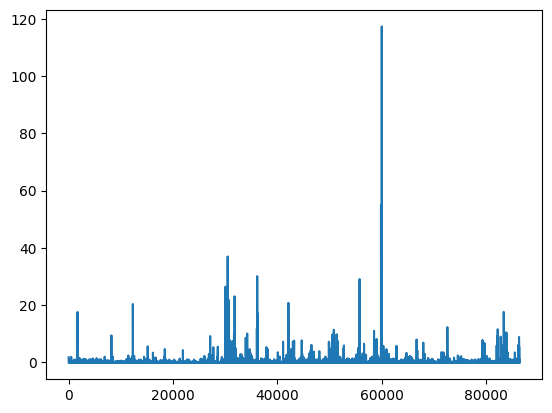

In [9]:
books.buy_volume.plot()

In [10]:
(books.sell_volume == 0).sum()

np.int64(39121)

<Axes: >

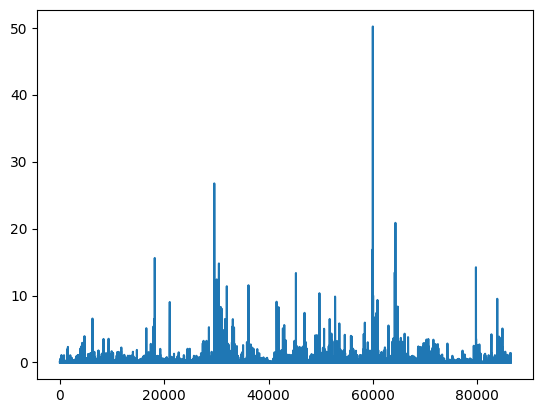

In [11]:
books.sell_volume.plot()

In [22]:
books.vwap.replace(0, np.nan).ffill()

0        114049.323681
1        114067.813647
2        114066.633379
3        114062.100363
4        114063.214639
             ...      
86395    118583.306848
86396    118605.743943
86397      6876.008553
86398    118607.627294
86399      6876.008537
Name: vwap, Length: 86400, dtype: float64

<Axes: >

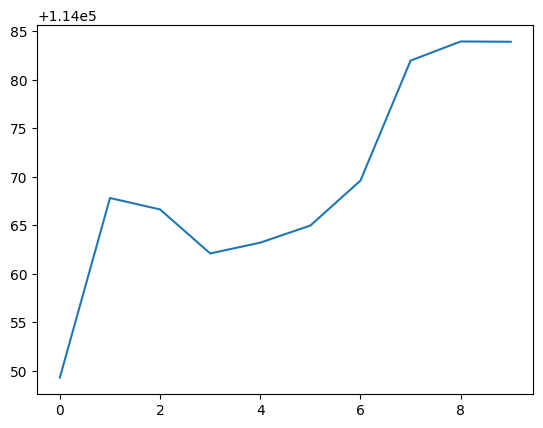

In [24]:
books.vwap[:10].plot()

In [24]:
with open('./btcusdt_l2/BTC-USDT-L2orderbook-400lv-2025-10-01.data') as f:
    lines = f.readlines(10)

In [27]:
pd.to_datetime(1759276800005, unit='ms')

Timestamp('2025-10-01 00:00:00.005000')

In [25]:
lines

['{"instId":"BTC-USDT","action":"snapshot","ts":"1759276800005","asks":[["114047.2","1.20851448","5"],["114047.3","0.00027867","1"],["114047.6","0.00153688","3"],["114048.0","0.03420657","2"],["114048.5","4.235e-05","1"],["114048.7","9.997e-05","1"],["114048.9","1e-05","1"],["114049.1","0.0964458","2"],["114049.6","4.202e-05","1"],["114049.7","9.997e-05","1"],["114049.8","4.824e-05","1"],["114049.9","2.952e-05","2"],["114050.0","0.00187969","3"],["114050.8","0.19728346","2"],["114051.0","0.00048","2"],["114051.4","4.101e-05","1"],["114051.5","8.99e-05","1"],["114051.6","1.608e-05","1"],["114052.0","0.00180657","1"],["114052.1","0.19726477","1"],["114052.6","5.551e-05","2"],["114052.7","0.00012242","2"],["114052.8","4.462e-05","1"],["114053.3","0.00042364","1"],["114053.7","0.00014616","1"],["114054.0","0.00183202","3"],["114054.3","4.847e-05","3"],["114054.6","1e-05","1"],["114054.9","0.00053391","1"],["114055.0","6.001e-05","1"],["114056.0","0.00180657","1"],["114056.2","0.002","1"],[

In [29]:
trades.tail()

,instrument_name,trade_id,side,price,size,created_time
670637,BTC-USDT,813255490,buy,117424.7,0.013776,1759334398642
670638,BTC-USDT,813255491,buy,117425.0,0.013129,1759334398642
670639,BTC-USDT,813255492,buy,117425.0,0.001703,1759334399967
670640,BTC-USDT,813255493,buy,117425.0,0.000123,1759334399967
670641,BTC-USDT,813255494,buy,117425.0,0.017032,1759334399967


In [23]:
pd.to_datetime(trades.created_time, unit='ms')

0        2025-09-30 16:00:00.539
1        2025-09-30 16:00:00.547
2        2025-09-30 16:00:00.549
3        2025-09-30 16:00:00.549
4        2025-09-30 16:00:00.549
                   ...          
670637   2025-10-01 15:59:58.642
670638   2025-10-01 15:59:58.642
670639   2025-10-01 15:59:59.967
670640   2025-10-01 15:59:59.967
670641   2025-10-01 15:59:59.967
Name: created_time, Length: 670642, dtype: datetime64[ns]

In [15]:
(trades['side']=='sell').sum()

np.int64(324194)

In [16]:
(trades['side']=='buy').sum()

np.int64(346448)

<Axes: >

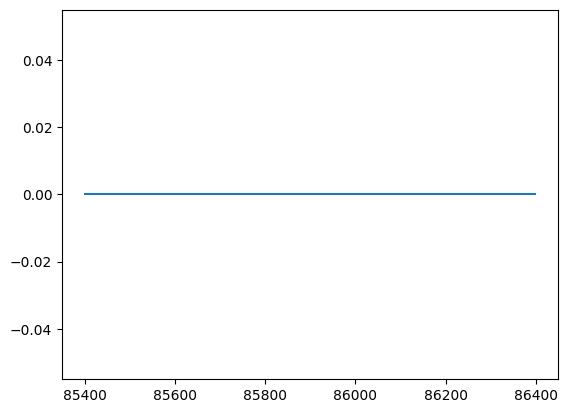

In [14]:
books.buy_volume[-1000:].plot()

<Axes: >

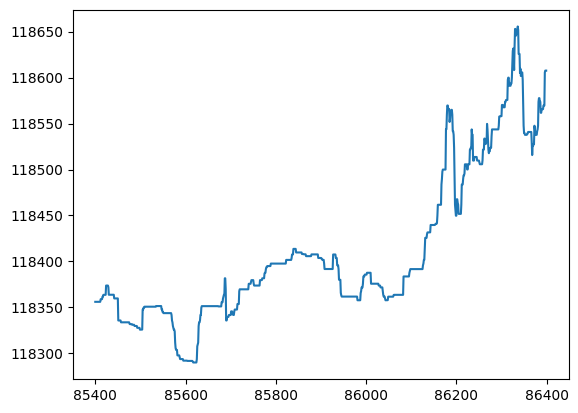

In [13]:
books.vwap[-1000:].plot()

<Axes: >

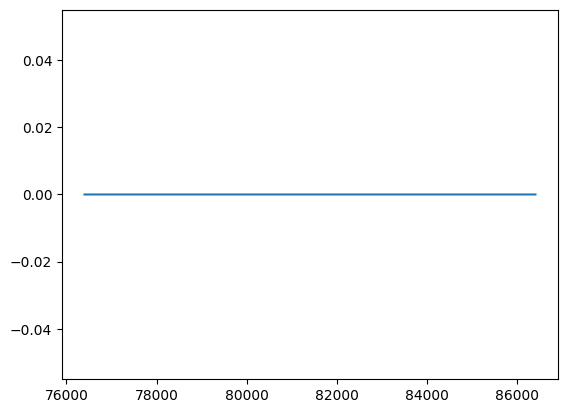

In [7]:
books.buy_volume[-10000:].plot()

In [16]:
books.columns

Index(['timestamp', 'iso_time', 'vwap', 'buy_volume', 'sell_volume',
       'ask_size_1', 'ask_size_2', 'ask_size_3', 'ask_size_4', 'ask_size_5',
       'ask_size_6', 'ask_size_7', 'ask_size_8', 'ask_size_9', 'ask_size_10',
       'bid_size_1', 'bid_size_2', 'bid_size_3', 'bid_size_4', 'bid_size_5',
       'bid_size_6', 'bid_size_7', 'bid_size_8', 'bid_size_9', 'bid_size_10'],
      dtype='object')

<Axes: >

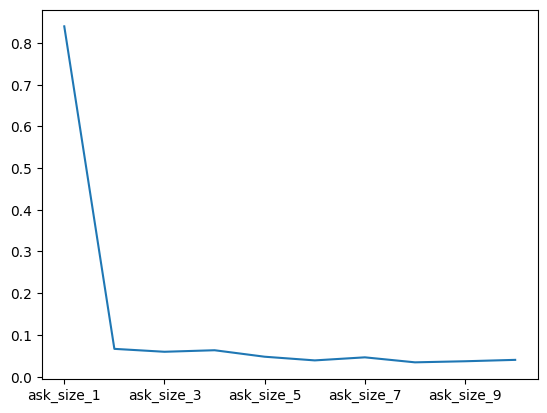

In [17]:
d = 10
books.iloc[:1000, 5:5+d].mean().plot()

<Axes: >

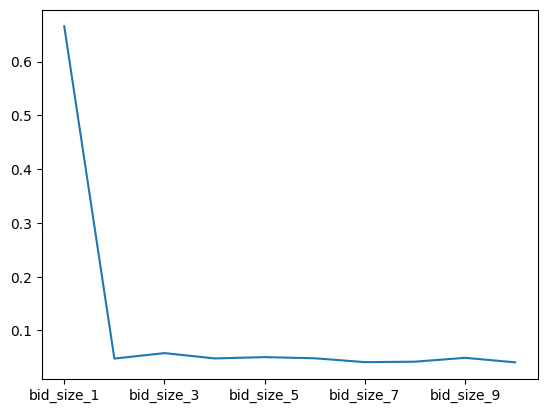

In [18]:
books.iloc[:1000, 5+d:5+2*d].mean().plot()

In [3]:
books.shape

(86400, 108)

<Axes: >

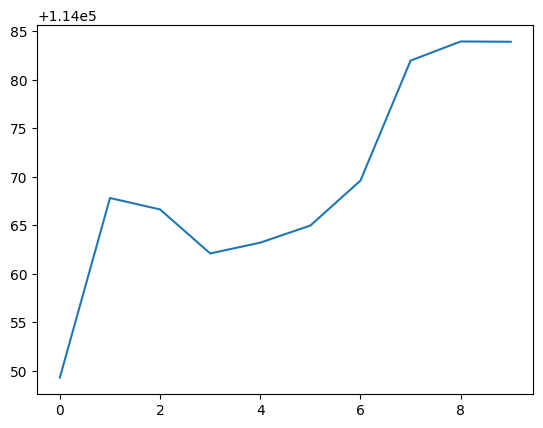

In [19]:
books.vwap[:10].plot()

<Axes: >

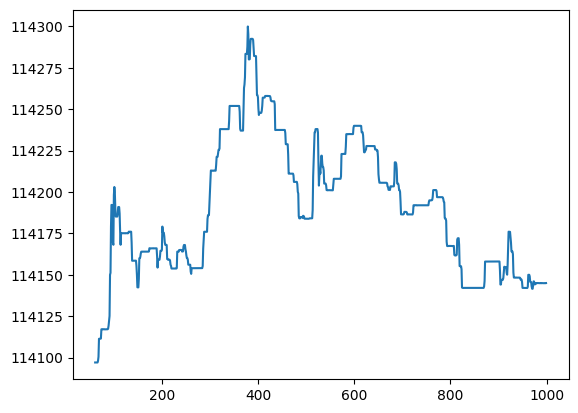

In [8]:
books.vwap[60:1000].plot()

<Axes: >

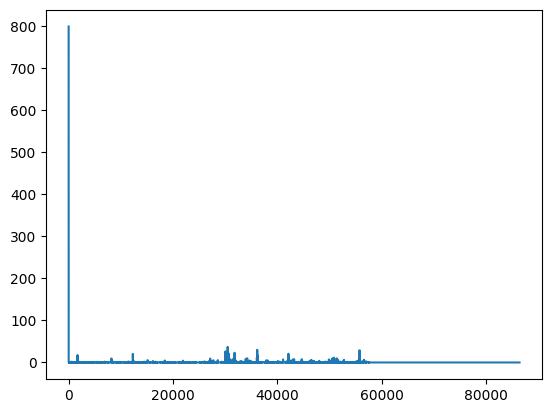

In [11]:
books.buy_volume.plot()